In [4]:
import os
import sqlalchemy as db
import geopandas as gpd
import pandas as pd
import osmnx
from shapely.geometry import box, LineString, Point
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np

In [5]:
POSTGRES_HOST="xxxx"
POSTGRES_PORT="xxxx"
POSTGRES_DB="xxxx"
POSTGRES_SCHEMA="xxxx"
POSTGRES_USER="xxxx"
POSTGRES_PASSWORD="xxxx"

In [6]:
engine = db.create_engine('postgresql://{user}:{pw}@{host}/{db}'
                           .format(user=POSTGRES_USER,
                                   pw=POSTGRES_PASSWORD,
                                   host=POSTGRES_HOST,
                                   db=POSTGRES_DB,
                                   port=POSTGRES_PORT))

In [7]:
connection = engine.connect()

# Study area of South East Spain

In [10]:
min_lon =31.50
min_lat = 32.43
max_lon= 36
max_lat=  37.5
bbox = box(min_lon, min_lat, max_lon, max_lat)
bbox_wkt = bbox.wkt

In [11]:
query = "SELECT *,linestring AS geom FROM public.ways WHERE ST_Intersects(linestring, ST_GeomFromText('POLYGON ((0 37, 0 38, -1 38, -1 37, 0 37))', 4326)) AND (tags -> 'seamark:type'='separation_boundary' OR tags -> 'seamark:type'='separation_line' OR tags -> 'seamark:type'='separation_zone' OR tags -> 'seamark:type'='separation_lane')"
gdf_ways = gpd.read_postgis(query, engine)

In [12]:
#gdf_ways = gpd.read_postgis(query, engine)
gdf_ways['tstamp']=gdf_ways['tstamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
gdf_ways

,id,version,user_id,tstamp,changeset_id,tags,nodes,linestring,bbox,geom
0,369843715,1,3213862,2015-09-09 11:32:50,33906358,{'seamark:type': 'separation_lane'},"[3735908103, 3735908102, 3735908100]",0102000020E610000003000000802260BE064EE1BF26E9...,0103000020E610000001000000050000003CF482F4B9BF...,"LINESTRING (-0.54077 37.59114, -0.55495 37.577..."
1,369835523,1,3213862,2015-09-09 10:33:15,33904993,{'seamark:type': 'separation_line'},"[3735830576, 3735830575, 3735830573]",0102000020E610000003000000ECDF505326D0E1BF568A...,0103000020E6100000010000000500000084D95FD10811...,"LINESTRING (-0.55666 37.59500, -0.56334 37.583..."
2,369833376,2,3213862,2015-09-09 12:30:50,33907759,"{'seamark:name': 'DST Cabo de Palos', 'seamark...","[3735792516, 3735792514, 3735792513, 373579251...",0102000020E610000007000000CA2D52CD512CE1BFD941...,0103000020E610000001000000050000003B7716180D74...,"LINESTRING (-0.53666 37.57335, -0.57667 37.546..."
3,369843714,1,3213862,2015-09-09 11:32:50,33906358,{'seamark:type': 'separation_lane'},"[3735908098, 3735908099, 3735908101]",0102000020E6100000030000000F92AA926D85E1BF9BFD...,0103000020E610000001000000050000000F92AA926D85...,"LINESTRING (-0.54754 37.52663, -0.51086 37.551..."
4,369835522,1,3213862,2015-09-09 10:33:14,33904993,{'seamark:type': 'separation_line'},"[3735830570, 3735830571, 3735830574]",0102000020E61000000300000055DFF945093AE1BFB18A...,0103000020E6100000010000000500000055DFF945093A...,"LINESTRING (-0.53833 37.52000, -0.50000 37.541..."
5,369835520,1,3213862,2015-09-09 10:33:14,33904993,{'seamark:type': 'separation_boundary'},"[3735830577, 3735830576]",0102000020E610000002000000FDAD539BEE2BE7BFE401...,0103000020E61000000100000005000000FDAD539BEE2B...,"LINESTRING (-0.72411 37.91076, -0.55666 37.59500)"
6,369835521,1,3213862,2015-09-09 10:33:14,33904993,{'seamark:type': 'separation_boundary'},"[3735830572, 3735830573]",0102000020E610000002000000B59146600769EDBF1C8B...,0103000020E61000000100000005000000B59146600769...,"LINESTRING (-0.91907 37.55407, -0.59583 37.56250)"


In [13]:
gdf_ways.explore()

In [14]:
gdf = []
for x in gdf_ways['geom']:
    #generate_arrows(x)
    x , y = x.xy
    print(x)
    d = {'x': x, 'y': y}
    df = pd.DataFrame(data = d)
    gdf.append(df)

array('d', [-0.5407747, -0.5549508, -0.5859041])
array('d', [-0.5566589, -0.5633378, -0.5958294])
array('d', [-0.5366601, -0.5766664, -0.5583329, -0.5233404, -0.5050051, -0.5233335, -0.5366601])
array('d', [-0.5475376, -0.5108619, -0.4918737])
array('d', [-0.5383345, -0.5000007, -0.4783407])
array('d', [-0.7241128, -0.5566589])
array('d', [-0.9190709, -0.5958294])


# Study area of Cartegena

In [17]:
query = "SELECT *,linestring AS geom FROM public.ways WHERE ST_Intersects(linestring, ST_GeomFromText('POLYGON ((0 37, 0 38, -1 38, -1 37, 0 37))', 4326)) AND (tags -> 'seamark:type'='separation_line' OR tags -> 'seamark:type'='separation_zone' OR tags -> 'seamark:type'='separation_lane')"
gdf_ways = gpd.read_postgis(query, engine)
gdf_ways['tstamp']=gdf_ways['tstamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
gdf_ways

,id,version,user_id,tstamp,changeset_id,tags,nodes,linestring,bbox,geom
0,369843715,1,3213862,2015-09-09 11:32:50,33906358,{'seamark:type': 'separation_lane'},"[3735908103, 3735908102, 3735908100]",0102000020E610000003000000802260BE064EE1BF26E9...,0103000020E610000001000000050000003CF482F4B9BF...,"LINESTRING (-0.54077 37.59114, -0.55495 37.577..."
1,369835523,1,3213862,2015-09-09 10:33:15,33904993,{'seamark:type': 'separation_line'},"[3735830576, 3735830575, 3735830573]",0102000020E610000003000000ECDF505326D0E1BF568A...,0103000020E6100000010000000500000084D95FD10811...,"LINESTRING (-0.55666 37.59500, -0.56334 37.583..."
2,369833376,2,3213862,2015-09-09 12:30:50,33907759,"{'seamark:name': 'DST Cabo de Palos', 'seamark...","[3735792516, 3735792514, 3735792513, 373579251...",0102000020E610000007000000CA2D52CD512CE1BFD941...,0103000020E610000001000000050000003B7716180D74...,"LINESTRING (-0.53666 37.57335, -0.57667 37.546..."
3,369843714,1,3213862,2015-09-09 11:32:50,33906358,{'seamark:type': 'separation_lane'},"[3735908098, 3735908099, 3735908101]",0102000020E6100000030000000F92AA926D85E1BF9BFD...,0103000020E610000001000000050000000F92AA926D85...,"LINESTRING (-0.54754 37.52663, -0.51086 37.551..."
4,369835522,1,3213862,2015-09-09 10:33:14,33904993,{'seamark:type': 'separation_line'},"[3735830570, 3735830571, 3735830574]",0102000020E61000000300000055DFF945093AE1BFB18A...,0103000020E6100000010000000500000055DFF945093A...,"LINESTRING (-0.53833 37.52000, -0.50000 37.541..."


In [18]:
gdf_ways.explore()

In [19]:
query = "SELECT *,linestring AS geom FROM public.ways WHERE ST_Intersects(linestring, ST_GeomFromText('POLYGON ((0 37, 0 38, -1 38, -1 37, 0 37))', 4326)) AND ( tags -> 'seamark:type'='separation_lane')"
gdf_ways = gpd.read_postgis(query, engine)
gdf_ways['tstamp']=gdf_ways['tstamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
gdf_ways

,id,version,user_id,tstamp,changeset_id,tags,nodes,linestring,bbox,geom
0,369843715,1,3213862,2015-09-09 11:32:50,33906358,{'seamark:type': 'separation_lane'},"[3735908103, 3735908102, 3735908100]",0102000020E610000003000000802260BE064EE1BF26E9...,0103000020E610000001000000050000003CF482F4B9BF...,"LINESTRING (-0.54077 37.59114, -0.55495 37.577..."
1,369843714,1,3213862,2015-09-09 11:32:50,33906358,{'seamark:type': 'separation_lane'},"[3735908098, 3735908099, 3735908101]",0102000020E6100000030000000F92AA926D85E1BF9BFD...,0103000020E610000001000000050000000F92AA926D85...,"LINESTRING (-0.54754 37.52663, -0.51086 37.551..."


In [20]:
gdf = []
for x in gdf_ways['geom']:
    #generate_arrows(x)
    x , y = x.xy
    print(x)
    d = {'x': x, 'y': y}
    df = pd.DataFrame(data = d)
    gdf.append(df)

array('d', [-0.5407747, -0.5549508, -0.5859041])
array('d', [-0.5475376, -0.5108619, -0.4918737])


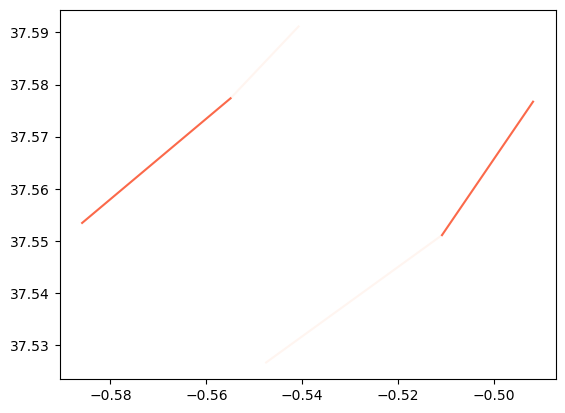

In [21]:
fig, ax = plt.subplots()
for i in range(len(gdf)):
    #ax = gdf[i].plot.scatter(x = x, y= y,ax = ax)
    df = gdf[i]
    x = df.x
    y = df.y
    for i in range(len(x) - 1):
        color = plt.cm.Reds(i / (len(x) - 1))  # Color based on index order
        ax.plot([x[i], x[i+1]], [y[i], y[i+1]], color=color)
plt.show()

## Study area of South West Spain

Start	N 36.115° - W 10.020°
Finish	N 37.402° - W 8.540°

In [22]:
min_lon =-10.020
min_lat = 36.115
max_lon= -8.540
max_lat=  37.402
bbox = box(min_lon, min_lat, max_lon, max_lat)
bbox_wkt = bbox.wkt

In [23]:
#query = "SELECT *,linestring AS geom FROM public.ways WHERE (tags -> 'seamark:type'='separation_boundary' OR tags -> 'seamark:type'='separation_line' OR tags -> 'seamark:type'='separation_zone' OR tags -> 'seamark:type'='separation_lane') AND ST_Intersects(linestring, ST_GeomFromText('{}', 4326))".format((bbox_wkt))
query = "SELECT *,linestring AS geom FROM public.ways WHERE tags -> 'seamark:type'='separation_lane' AND  ST_Intersects(linestring, ST_GeomFromText('{}', 4326))".format((bbox_wkt))

In [24]:
gdf_ways = gpd.read_postgis(query, engine)
gdf_ways['tstamp']=gdf_ways['tstamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
gdf_ways

,id,version,user_id,tstamp,changeset_id,tags,nodes,linestring,bbox,geom
0,180750440,1,53936,2012-09-12 20:55:29,13089009,{'seamark:type': 'separation_lane'},"[1912128954, 1912128964, 1912128986, 191212901...",0102000020E6100000050000008C1CD8E0330C22C0BB39...,0103000020E610000001000000050000004C37894160E5...,"LINESTRING (-9.02383 36.63550, -9.20767 36.677..."
1,180750436,1,53936,2012-09-12 20:55:28,13089009,{'seamark:type': 'separation_lane'},"[1912128972, 1912128981, 1912129031, 1912129064]",0102000020E61000000400000043DB7B0272FF21C01DB4...,0103000020E61000000100000005000000CE7CBDB156B7...,"LINESTRING (-8.99892 36.70709, -9.15775 36.742..."
2,180750437,1,53936,2012-09-12 20:55:28,13089009,{'seamark:type': 'separation_lane'},"[1912129071, 1912129034, 1912129010, 1912129000]",0102000020E610000004000000C1CAA145B67322C0D976...,0103000020E61000000100000005000000C1CAA145B673...,"LINESTRING (-9.22600 37.03608, -9.20025 36.934..."
3,180750438,1,53936,2012-09-12 20:55:29,13089009,{'seamark:type': 'separation_lane'},"[1912129041, 1912128996, 1912128962, 191212894...",0102000020E610000005000000CAF154D1693323C09EE6...,0103000020E61000000100000005000000CAF154D16933...,"LINESTRING (-9.60042 36.96642, -9.54842 36.786..."
4,180750441,1,53936,2012-09-12 20:55:29,13089009,{'seamark:type': 'separation_lane'},"[1912129038, 1912128984, 1912128953, 191212893...",0102000020E61000000500000041B0F4EB986023C0C318...,0103000020E6100000010000000500000041B0F4EB9860...,"LINESTRING (-9.68867 36.95000, -9.63117 36.751..."


In [25]:
gdf_ways.explore()

In [26]:
gdf_ways.explore()

In [27]:

gdf = []
for x in gdf_ways['geom']:
    #generate_arrows(x)
    x , y = x.xy
    print(x)
    d = {'x': x, 'y': y}
    df = pd.DataFrame(data = d)
    gdf.append(df)

array('d', [-9.0238333, -9.2076667, -9.3065833, -9.4055, -9.448])
array('d', [-8.9989167, -9.15775, -9.3210833, -9.3580833])
array('d', [-9.226, -9.20025, -9.0886667, -8.9626667])
array('d', [-9.6004167, -9.5484167, -9.42025, -9.2920833, -9.0658333])
array('d', [-9.6886667, -9.6311667, -9.486125, -9.3410833, -9.09025])


In [28]:
gdf

[          x          y
 0 -9.023833  36.635505
 1 -9.207667  36.677004
 2 -9.306583  36.762383
 3 -9.405500  36.847668
 4 -9.448000  36.994917,
           x          y
 0 -8.998917  36.707088
 1 -9.157750  36.742837
 2 -9.321083  36.883668
 3 -9.358083  37.011667,
           x          y
 0 -9.226000  37.036083
 1 -9.200250  36.934084
 2 -9.088667  36.836751
 3 -8.962667  36.811502,
           x          y
 0 -9.600417  36.966417
 1 -9.548417  36.786501
 2 -9.420250  36.675874
 3 -9.292083  36.565087
 4 -9.065833  36.514004,
           x          y
 0 -9.688667  36.950000
 1 -9.631167  36.751001
 2 -9.486125  36.625688
 3 -9.341083  36.500170
 4 -9.090250  36.443421]

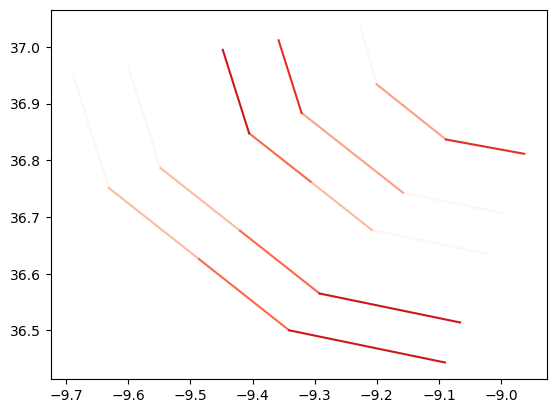

In [29]:
fig, ax = plt.subplots()
for i in range(len(gdf)):
    #ax = gdf[i].plot.scatter(x = x, y= y,ax = ax)
    df = gdf[i]
    x = df.x
    y = df.y
    for i in range(len(x) - 1):
        color = plt.cm.Reds(i / (len(x) - 1))  # Color based on index order
        ax.plot([x[i], x[i+1]], [y[i], y[i+1]], color=color)
plt.show()

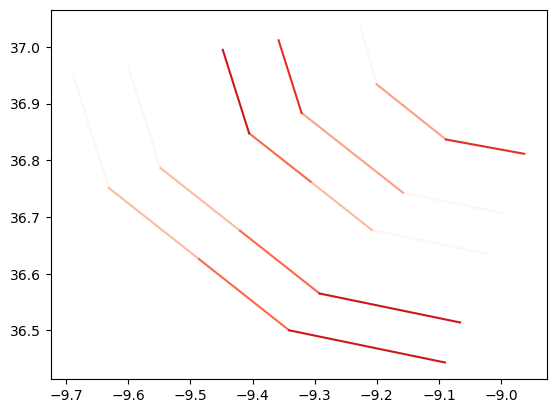

In [30]:
fig, ax = plt.subplots()
for idx in range(len(gdf)):
    #ax = gdf[i].plot.scatter(x = x, y= y,ax = ax)
    df = gdf[idx]
    x = df.x
    y = df.y
    for i in range(len(x) - 1):
        color = plt.cm.Reds(i / (len(x) - 1))  # Color based on index order
        ax.plot([x[i], x[i+1]], [y[i], y[i+1]], color=color)
    if idx == 4:
        break
plt.show()